# Basics of qiskit programming

## Managing libraries and packages

### First time setup procedure

1. Download the `requirements.txt` file from the repository.

2. Create a virtual environment on your local machine.

3. Install required packages using the `requirements.txt` file. 


Installation may take a long time.

#### Installing and updating packages

In [1]:
%pip install --upgrade -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Importing libraries

In [90]:
# Optional -- for envoking "auto detection" capabilities of Pylance (extension for VSCode).
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np
from numpy import array, sqrt

import qiskit as qk
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import UGate
from qiskit.quantum_info import Statevector, Operator, PauliList
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService

# For high-performance simulation
from qiskit_aer import AerSimulator

import random


In [3]:
print(f"Qiskit version: {qk.__version__}")

Qiskit version: 1.4.1


## Representation using `numpy`
### Building quantum states using `numpy`

In [4]:
ket0 = np.array([[1], [0]])
ket1 = np.array([[0], [1]])

print(ket0 / 2 + ket1 / 2)

# %%
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / sqrt(2) + M2 / sqrt(2)
print(M)
display(array_to_latex(M))


[[0.5]
 [0.5]]
[[1.41421356 0.70710678]
 [0.         0.70710678]]


<IPython.core.display.Latex object>

Comparing standard format with the latex format

In [5]:
# Matrix Multiplication
print(np.matmul(M1, ket0))
print(np.matmul(M1, M2))
print(np.matmul(M2, ket0))


[[1]
 [0]]
[[1 1]
 [0 0]]
[[1]
 [0]]


In [6]:
# Displaying the results in Latex format, using array_to_latex from qiskit
display(array_to_latex(M1))
display(array_to_latex(M2))
display(array_to_latex(M))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## `Statevector` class

Use `Statevector` objects to represent quantum states. 

Available `Statevector` methods include `.draw()`, `.is_valid()`, `.tensor()`, `.measure()`, `.sample_counts()`.

We can generate a `Statevector` object using the `Statevector()` constructor or using the `from_label()` method.

In [7]:
# Methods: draw(), is_valid(), measure()
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])
display(array_to_latex(u))  
display(array_to_latex(v))  
display(array_to_latex(w)) 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### `Statevector` can be printed in different formats. 

Using `.draw()` method, we can draw `Statevector` in `"text"`, `"latex"`, and `"latex_source"` formats.

In [8]:
print("Float format:")
display(u.draw("text"))
print("LaTex format:")
display(u.draw("latex"))
print("LaTex source code:")
display(u.draw("latex_source"))

Float format:


[0.70710678+0.j,0.70710678+0.j]

LaTex format:


<IPython.core.display.Latex object>

LaTex source code:


'\\frac{\\sqrt{2}}{2} |0\\rangle+\\frac{\\sqrt{2}}{2} |1\\rangle'

#### The `.is_valid()` method

The `.is_valid()` method returns `True` if the `Statevector` is valid.

In [9]:
display(v.draw("latex"))
display(v.draw("latex_source"))
# display(v.is_valid())
print(f"This statevector {(lambda v: 'is' if v.is_valid() else 'is not')(v)} valid.")

<IPython.core.display.Latex object>

'(\\frac{1}{3} + \\frac{2 i}{3}) |0\\rangle- \\frac{2}{3} |1\\rangle'

This statevector is valid.


#### The `.measure()` method

The `.measure()` method returns the resulting `Statevector` of peforming a single standard basis measurement. The outcome is determined by the probability (amplitude) distribution of the original `Statevector`. 

In [10]:
# Returns an outcome, which is determined by probabilities, and resulting statevector.

# First measurement
outcome1, state1 = v.measure()
print(f"Measured: {outcome1}\nPost-measurement state:")
display(state1.draw("latex"))

# Second measurement
outcome2, state2 = v.measure()
print(f"Measured: {outcome2}\nPost-measurement state:")
display(state2.draw("latex"))


Measured: 1
Post-measurement state:


<IPython.core.display.Latex object>

Measured: 1
Post-measurement state:


<IPython.core.display.Latex object>

For partial measurements, we can specify the qubits to be measured. Qubits are ordered from right to left starting with index `[0]`.

In [11]:
w = Statevector([0, 1, 1, 0, 1, 0, 0, 0] / sqrt(3))
display(w.draw("latex"))

result, state = w.measure([0])
print(f"Measured: {result}\nState after measurement:")
display(state.draw("latex"))

result, state = w.measure([0,1])
print(f"Measured: {result}\nState after measurement:")
display(state.draw("latex"))

<IPython.core.display.Latex object>

Measured: 0
State after measurement:


<IPython.core.display.Latex object>

Measured: 00
State after measurement:


<IPython.core.display.Latex object>

#### The `.sample_counts()` method

We can use `.sample_counts()` method to perform multiple measurements. We can plot the resulting distribution using `plot_histogram()` function of the `qiskit.visualization` package. 

The `.sample_counts()` takes two arguments, the second argument specifies which qubits to measure in a partial measurement.

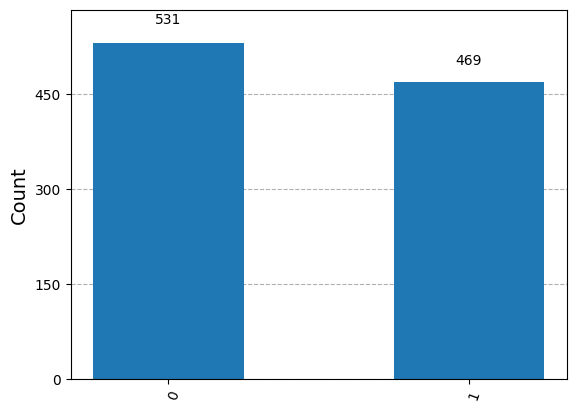

In [12]:
# Use .sample_counts() method to perform measurement multiple times
stats = v.sample_counts(1000)

# Plot the result
plot_histogram(stats)

For partial measurements, we can specify the qubits to be measured. Qubits are ordered from right to left starting with index `[0]`.

<IPython.core.display.Latex object>

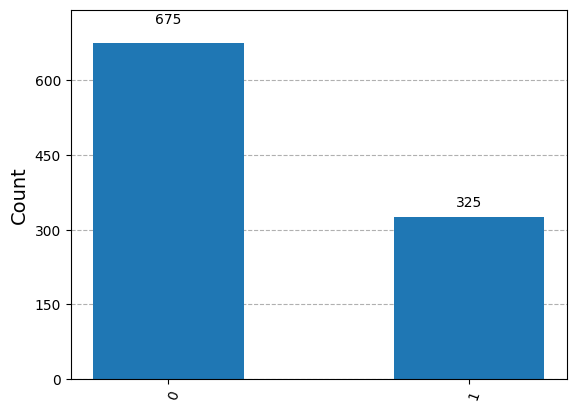

In [13]:
# Using the same state vector, w, as before.
w = Statevector([0, 1, 1, 0, 1, 0, 0, 0] / sqrt(3))
display(w.draw("latex"))

stat_w0 = w.sample_counts(1000, [0])
plot_histogram(stat_w0)

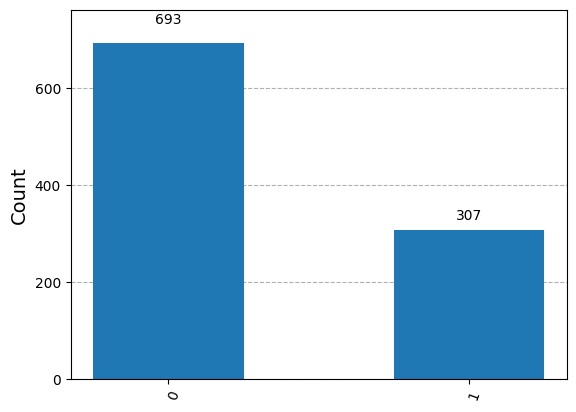

In [14]:
# Plotting the partial measurement of the left-most qubits. 
stat_w2 = w.sample_counts(1000, [2])
plot_histogram(stat_w2)

Generating `Statevector` using the `from_label()` method. Allowed labels include `"0"`, `"1"`, `"+"`, `"00"`, `"+i"`, and etc.

The `.tensor()` method can be used to create a tensor product of multiple `Statevector` objects.

Alternatively, the `^` operator can be used to create a tensor product of multiple `Statevector` objects as well.

In [15]:
zero = Statevector.from_label("0")
one = Statevector.from_label("1")
psi = zero.tensor(one)
phi = one ^ zero
display(psi.draw("latex"))
display(phi.draw("latex"))
display(phi)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


## `Operator` class

Using `Operator` to represent quantum gates and unitary operations and their effects on quantum states.

Avaliable methods include `draw()`, `is_unitary()`, and `evolve()`.

The `Operator` class also has a `.tensor()` method and a `.from_label()` method. Available labels include `"I"`, `"X"`, `"Y"`, `"Z"`, `"H"`, `"S"`, `"T"`, and etc.

Alternatively, the `^` operator can be used to create a tensor product of multiple `Operator` objects.

In [16]:
Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(T.draw("latex"))

print(f"Is T unitary? {T.is_unitary()}")

<IPython.core.display.Latex object>

Is T unitary? True


In [17]:
# We can apply a unitary operation to a state vector using the evolve method.
v = Statevector([1, 0])
display(v.draw("latex"))

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

display(v.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## `QuantumCircuit` class

Initialize a quantum circuit using `QuantumCircuit(x)` where `x` is the number of qubits.

Use `.if_test()` method to apply conditional gates on Classical qubits, where an "else block" can also be added. 

The `.barrier()` method adds a visual barrier in circuit diagram and also prevents cross-barrier optimization during compilation. 

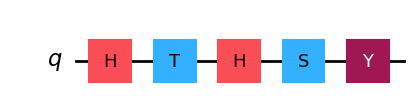

In [18]:
circuit_1 = QuantumCircuit(1) # input number of qubits

circuit_1.h(0)
circuit_1.t(0)
circuit_1.h(0)
circuit_1.s(0)
circuit_1.y(0)

display(circuit_1.draw(output="mpl"))

The default names of qubits are q0, q1, etc. We can choose our own names by using the `QuantumRegister` class.

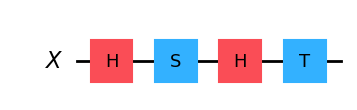

In [19]:
X = QuantumRegister(1, "X") # QuantumRegister(number of qubits, name of the qubits)
circuit = QuantumCircuit(X)
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw(output="mpl"))

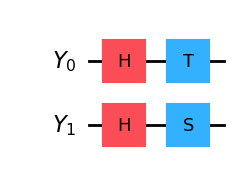

In [20]:
QReg = QuantumRegister(2, "Y") # (number of qubits, name of the qubits)

circuit_2 = QuantumCircuit(QReg)
circuit_2.h(QReg) # apply Hadamard gate to all qubits in the register
circuit_2.t(0)
circuit_2.s(1)

display(circuit_2.draw(output="mpl"))

To get the unitary operator of the circuit, use the `from_circuit` method of the `Operator` class.

In [21]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

Initialize with a quantum `Statevector` and evolve it using the circuit.

In [22]:
ket00 = Statevector.from_label("00")
display(ket00.draw("latex"))

v = ket00.evolve(circuit)
display(v.draw("latex"))
v.is_valid()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

True

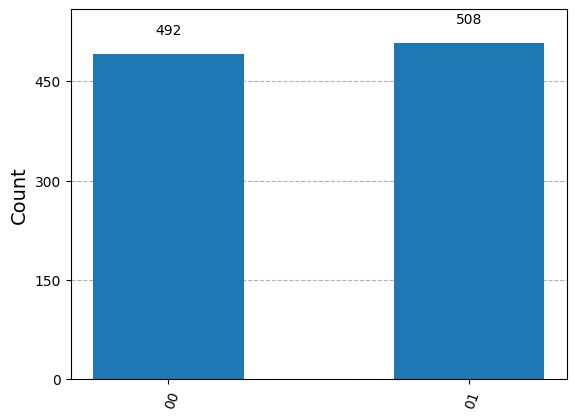

In [23]:
stats2 = v.sample_counts(1000)
plot_histogram(stats2)

# 2. Quantum Circuits


### Example 1: Let us build a quantum circuit.

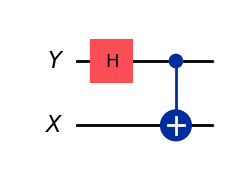

<IPython.core.display.Latex object>

In [ ]:
X_1 = QuantumRegister(1, "X")
Y_1 = QuantumRegister(1, "Y")
circuit_3 = QuantumCircuit(Y_1, X_1) # Here the order of wires is top to bottom.
circuit_3.h(Y_1)
circuit_3.cx(0, 1,)

display(circuit_3.draw("mpl"))

display(Operator.from_circuit(circuit_3).draw("latex"))

The order of qubits are bottom-to-top. 

In [54]:
ket01 = Statevector.from_label("01")
display(ket01.draw("latex"))

display(ket01.evolve(circuit_3).draw("latex"))

ket10 = Statevector.from_label("10")
display(ket10.draw("latex"))

display(ket10.evolve(circuit_3).draw("latex"))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Example 2: Quantum circuits with classical wires.

Use `ClasssicalRegister()` to initialize classical wires. Classical wires appear on the bottom of the circuit diagram by default. 

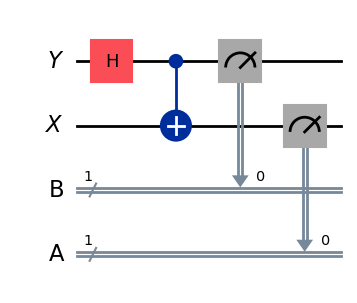

In [ ]:
A_1 = ClassicalRegister(1, "A")
B_1 = ClassicalRegister(1, "B")

circuit_4 = QuantumCircuit(Y_1, X_1, B_1, A_1,)
circuit_4.h(Y_1)
circuit_4.cx(Y_1, X_1)
circuit_4.measure(Y_1, B_1)
circuit_4.measure(X_1, A_1)
display(circuit_4.draw(output="mpl"))

{'1 1': 474, '0 0': 550}


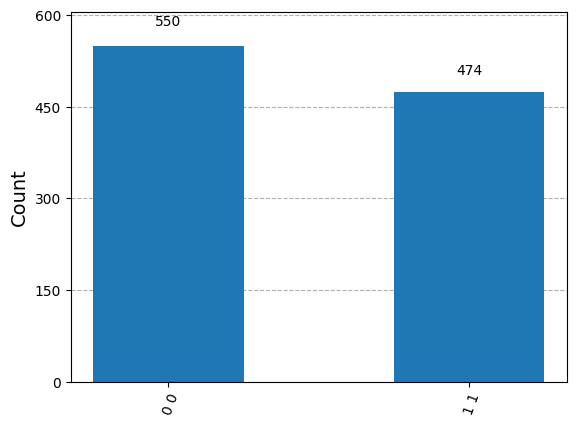

In [39]:
result_4 = AerSimulator().run(circuit_4).result()
stats_4 = result_4.get_counts()
print(stats_4)
plot_histogram(stats_4)

## Quantum Teleportation

First, define the circuit.

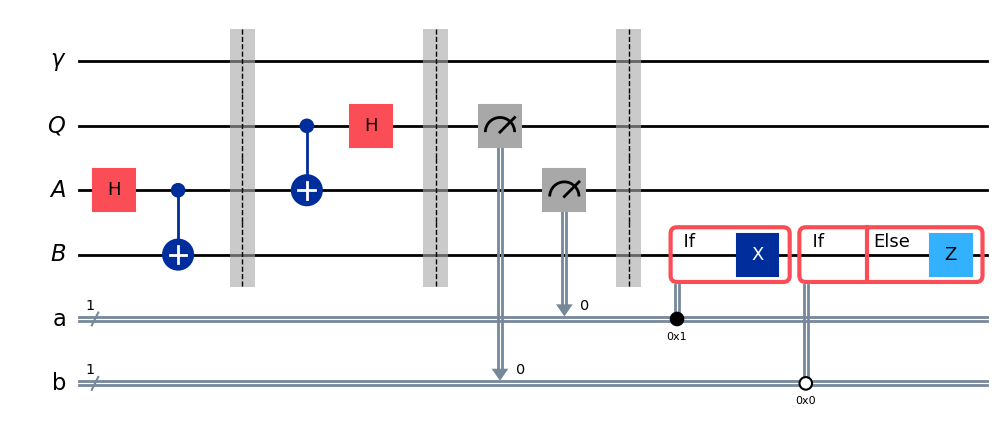

In [98]:
Alice = QuantumRegister(1, "A")
Bob = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")
qubit = QuantumRegister(1, "Q")
# This represents other qubits possibly entangled with Q.
R = QuantumRegister(1, "\gamma")

circ_teleport = QuantumCircuit(R, qubit, Alice, a, b, Bob,)

# Preparing entangled qubit, phi+
circ_teleport.h(Alice)
circ_teleport.cx(Alice, Bob)
circ_teleport.barrier()

# Beginning of the teleportation protocol
circ_teleport.cx(qubit, Alice)
circ_teleport.h(qubit)
circ_teleport.barrier()

circ_teleport.measure(qubit,b)
circ_teleport.measure(Alice,a)
circ_teleport.barrier()


with circ_teleport.if_test((a, 1)):
    circ_teleport.x(Bob)

# Can also use an else block, "else_" can be replace by any name.
# Here, I am using 0 as control, as opposed to 1. 
# As a result, the dot in the circuit diagram is hollow as opposed to filled. 
with circ_teleport.if_test((b, 0)) as else_:
    None
with else_:
    circ_teleport.z(Bob)

circ_teleport.draw("mpl")

Generating a random gate that produce a random state for Q, using `UGate()` function.

In [ ]:
import random
from numpy import pi
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(array_to_latex(random_gate.to_matrix()))

<IPython.core.display.Latex object>

Appending gates using `.append()` method.
Adding wire using `.add_register()` method.

Appending QuantumCircuits with `.compose()` method. Can compose in the front with front=True.


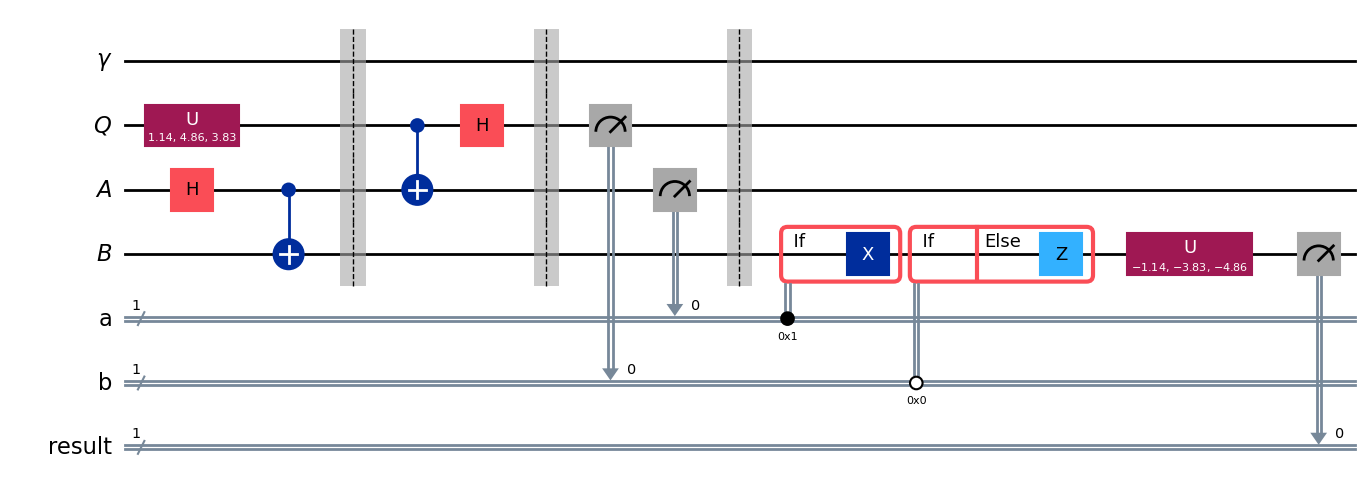

In [117]:
test_circ = QuantumCircuit(R, qubit, Alice, a, b, Bob,)

test_circ.append(random_gate, qubit)

test_circ.compose(circ_teleport, inplace=True)
test_circ.append(random_gate.inverse(), Bob)
Result = ClassicalRegister(1, "result")
test_circ.add_register(Result)
test_circ.measure(Bob, Result)

test_circ.draw("mpl")